In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5

In [ ]:
# ENV["JULIA_DEBUG"] = "BAT"

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements

In [3]:
# using Revise
using BAT 

In [4]:
include("../src/likelihood.jl")
include("../src/utill.jl")

corner_plots (generic function with 1 method)

In [5]:
conv_mat = load("../data/experiment/dataset_2/m2/conv-matrix-upd-1.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"], # error was here
);

In [6]:
# Experiment Event: 

images = load("../data/experiment/dataset_2/m2/images.jld2");

event_number = 2

event = (
    cam_1 = images["cam_1"][event_number,:,:],
    cam_2 = images["cam_2"][event_number,:,:],
    cam_3 = images["cam_3"][event_number,:,:],
    cam_4 = images["cam_4"][event_number,:,:],
    population = images["charge"][event_number,:][1],
)


(cam_1 = [11.0 0.0 … 0.0 695.0; 25.0 0.0 … 0.0 0.0; … ; 0.0 14.0 … 0.0 0.0; 145.0 8.0 … 29.0 132.0], cam_2 = [0.0 0.0 … 0.0 0.0; 217.0 0.0 … 0.0 0.0; … ; 0.0 127.0 … 0.0 0.0; 0.0 0.0 … 115.0 0.0], cam_3 = [454.0 86.0 … 0.0 0.0; 190.0 129.0 … 0.0 0.0; … ; 9.0 91.0 … 7.0 14.0; 20.0 4.0 … 10.0 10.0], cam_4 = [23.0 18.0 … 24.0 19.0; 18.0 20.0 … 27.0 14.0; … ; 30.0 15.0 … 24.0 15.0; 36.0 19.0 … 25.0 14.0], population = 26.462099075317383)

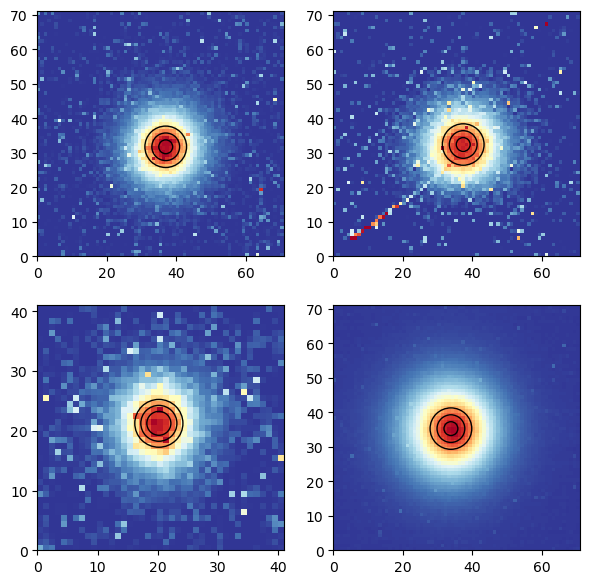

PyObject <matplotlib.patches.Circle object at 0x7fa742b865b0>

In [7]:
mu_1 = (36.9286689453851, 31.729251122539047)
mu_2 = (37.384819545805726, 32.38977768443977)
mu_3 = (20.182407890340016, 21.24390172130386)
mu_4 = (33.842100991565246, 35.258116457459685)


fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


circle1 = plt.Circle((mu_1[1], mu_1[2]), 2,  color="k", fill=false) #PyPlot.ColorMap("tab20c").colors[19]
circle2 = plt.Circle((mu_1[1], mu_1[2]), 4,  color="k", fill=false) 
circle3 = plt.Circle((mu_1[1], mu_1[2]), 6,  color="k", fill=false) 

ax[1,1].pcolormesh(0:71, 0:71, event.cam_1', cmap="RdYlBu_r")
ax[1,1].add_artist(circle1)
ax[1,1].add_artist(circle2)
ax[1,1].add_artist(circle3)

circle1 = plt.Circle((mu_2[1], mu_2[2]), 2,  color="k", fill=false) 
circle2 = plt.Circle((mu_2[1], mu_2[2]), 4,  color="k", fill=false) 
circle3 = plt.Circle((mu_2[1], mu_2[2]), 6,  color="k", fill=false) 

ax[1,2].pcolormesh(0:71, 0:71, event.cam_2', cmap="RdYlBu_r")
ax[1,2].add_artist(circle1)
ax[1,2].add_artist(circle2)
ax[1,2].add_artist(circle3)

circle1 = plt.Circle((mu_3[1], mu_3[2]), 2,  color="k", fill=false) 
circle2 = plt.Circle((mu_3[1], mu_3[2]), 3,  color="k", fill=false) 
circle3 = plt.Circle((mu_3[1], mu_3[2]), 4,  color="k", fill=false) 

ax[2,1].pcolormesh(0:41, 0:41, event.cam_3', cmap="RdYlBu_r")
ax[2,1].add_artist(circle1)
ax[2,1].add_artist(circle2)
ax[2,1].add_artist(circle3)

circle1 = plt.Circle((mu_4[1], mu_4[2]), 2,  color="k", fill=false) 
circle2 = plt.Circle((mu_4[1], mu_4[2]), 4,  color="k", fill=false) 
circle3 = plt.Circle((mu_4[1], mu_4[2]), 6,  color="k", fill=false) 

ax[2,2].pcolormesh(0:71, 0:71, event.cam_4', cmap="RdYlBu_r")
ax[2,2].add_artist(circle1)
ax[2,2].add_artist(circle2)
ax[2,2].add_artist(circle3)

In [8]:
function create_mask(mu, r, data)
    data = deepcopy(data)
    ind = CartesianIndices(data)
    
    for x in ind
        if ((x.I[1] - mu[1])^2 + (x.I[2] - mu[2])^2 ) <= r^2 
            data[x] = NaN 
        end
    end
    return data
end

create_mask (generic function with 1 method)

In [9]:
event_masked_1 = (
    cam_1 = create_mask(mu_1, 2, event.cam_1),
    cam_2 = create_mask(mu_2, 2, event.cam_2),
    cam_3 = create_mask(mu_3, 2, event.cam_3),
    cam_4 = create_mask(mu_4, 2, event.cam_4),
    population = event.population
)

event_masked_2 = (
    cam_1 = create_mask(mu_1, 4, event.cam_1),
    cam_2 = create_mask(mu_2, 4, event.cam_2),
    cam_3 = create_mask(mu_3, 3, event.cam_3),
    cam_4 = create_mask(mu_4, 4, event.cam_4),
    population = event.population
)

event_masked_3 = (
    cam_1 = create_mask(mu_1, 6, event.cam_1),
    cam_2 = create_mask(mu_2, 6, event.cam_2),
    cam_3 = create_mask(mu_3, 4, event.cam_3),
    cam_4 = create_mask(mu_4, 6, event.cam_4),
    population = event.population
);

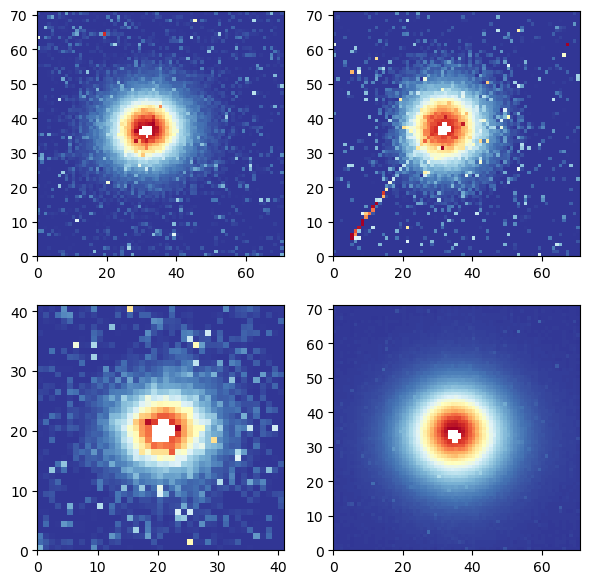

PyObject <matplotlib.collections.QuadMesh object at 0x7fa74f8d5850>

In [10]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event_masked_1.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event_masked_1.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event_masked_1.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event_masked_1.cam_4, cmap="RdYlBu_r")

In [11]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
log_likelihood = let e = event_masked_3, c = conv_matrices
    
    params -> begin
        
        ll = zero(Float64)
        ll += likelihood_cam13(params, e.cam_1, e.population, c.cam_1, 1)
        ll += likelihood_cam13(params, e.cam_2, e.population, c.cam_2, 2)
        ll += likelihood_cam13(params, e.cam_3, e.population, c.cam_3, 3)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4)
        return LogDVal(ll)
        
    end
end

β = 0.015

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.08, 0.25), truncated(Normal(0.2, 0.04), 0.08, 0.25)],
        ang_spr = [truncated(Normal(4.0, 2.0), 2.0, 6.0), truncated(Normal(4.0, 2.0), 2.0, 6.0)], # change prior range
        waist = [Normal(2.9, 0.03)],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 31.0 .. 33.0, # 30 .. 35
        resx = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        resy = [truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf), truncated(Normal(1, 0.5), 0, Inf)], 
        cam4_resx = truncated(Normal(1, 0.5), 0, Inf),
        cam4_resy = truncated(Normal(1, 0.5), 0, Inf),
        psx = [truncated(Normal(27.1, 27.1*β), 0., Inf), truncated(Normal(21.6, 21.6*β), 0., Inf), truncated(Normal(114.0, 114.0*β), 0., Inf)], # pixels are in microns
        psy = [truncated(Normal(30.5, 30.5*β), 0., Inf), truncated(Normal(23.4, 23.4*β), 0., Inf), truncated(Normal(125.0, 125.0*β), 0., Inf)],
        cam4_psx = truncated(Normal(91.0, 91.0*β), 0., Inf),
        cam4_psy = truncated(Normal(89.4, 91.0*β), 0., Inf),
        light_amp  = [35.14744, 50.23506, 10.09664],
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    );

In [12]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMetropolisTuning(
    λ = 0.5,
    α = 0.15..0.25,
    β = 1.5,
    c = 1e-4..1e2,
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCInitStrategy(
    init_tries_per_chain = 50..150,
    max_nsamples_init = 500,
    max_nsteps_init = 500,
    max_time_init = Inf
)

burnin = MCMCBurninStrategy(
    max_nsamples_per_cycle = 4000,
    max_nsteps_per_cycle = 4000,
    max_time_per_cycle = Inf,
    max_ncycles = 200
);

algorithm = MetropolisHastings();

In [13]:
nsamples = 3*10^5
nchains = 4

4

In [14]:
@time samples = bat_sample(
    posterior, (nsamples, nchains), algorithm,
    max_nsteps = nsamples,
    max_time = Inf,
    tuning = tuning,
    init = init,
    burnin = burnin,
    convergence = convergence,
    strict = false,
    filter = true
).result;



┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:193
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:304
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:65
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /Users/vhafych/MPP-Server/gitrepos/BAT.jl/src/samplers/mcmc/mcmc_tuner.jl:98
┌ I

2647.095932 seconds (1.12 G allocations: 654.160 GiB, 3.81% gc time)


In [17]:
BAT.bat_write("../data/sampling_results/DataTruncation/3-samples.hdf5", unshaped.(samples))

In [15]:
mode(samples)[1]

(tr_size = [0.1361983568122729, 0.14101833423924504], ang_spr = [4.08436568985035, 4.271840840238494], waist = [2.9130402324817357], algmx = [36.89961123104449, 37.34323560326596, 20.196904213909548, 33.86206791286769], algmy = [31.714304254548516, 32.31102547493491, 21.285305668357008, 35.28534256846823], cam4_ped = 32.772925820430004, cam4_light_fluct = 1.8752929430599918, cam4_light_amp = 31.11008409955971, resx = [0.9983083964978817, 1.3165787529831827, 0.4333823750843053], resy = [4.003670715001398, 1.0272656861867067, 2.5702977210774294], cam4_resx = 0.8334245087051353, cam4_resy = 0.5247877810257802, psx = [26.675207315237454, 21.719887534605068, 114.45186083827801], psy = [30.142072366028522, 23.775515759563792, 124.6059517934398], cam4_psx = 90.95858276164938, cam4_psy = 90.38771644456426, light_amp = [35.14744, 50.23506, 10.09664], s_cam = [0.0, 1.478, 15.026, 23.115])

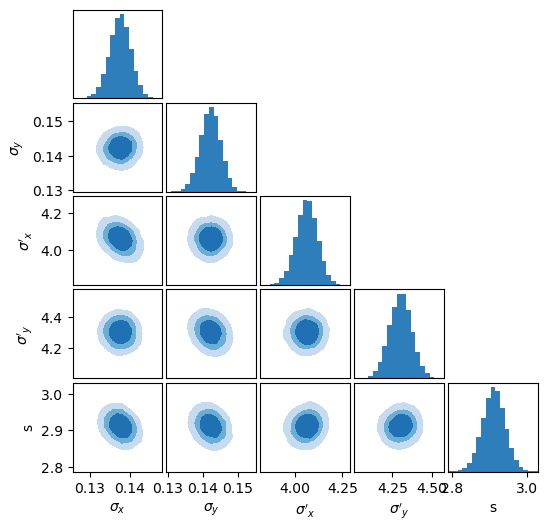

In [16]:
dims = [1,2,3,4,5,]
names = [L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", "s", "6", "7", "8", "9"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

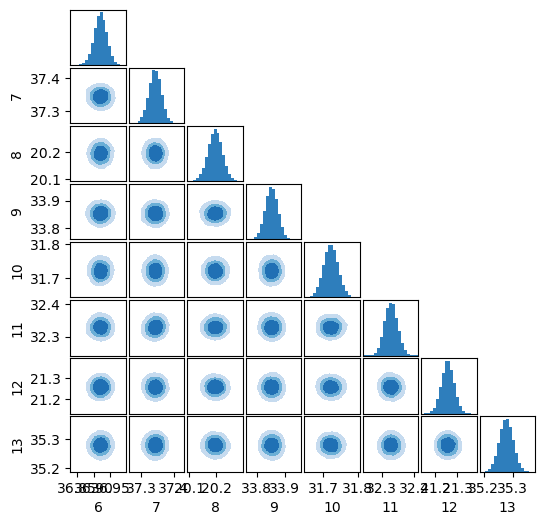

In [18]:
dims = [6,7,8,9,10,11,12, 13]
names = ["6", "7", "8", "9", "10", "11", "12", "13"]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

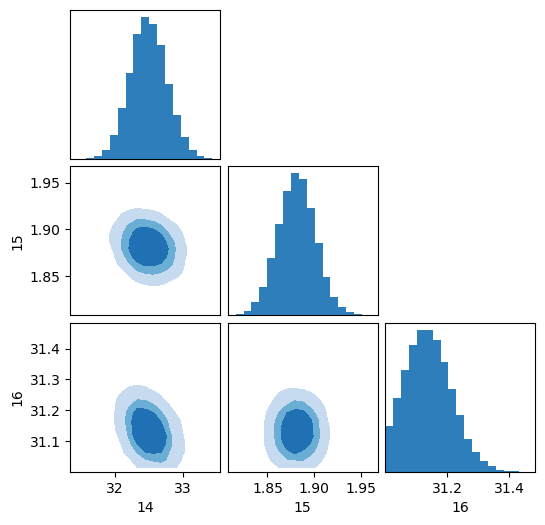

In [19]:
dims = [14,15,16,]
names = [14,15,16,]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

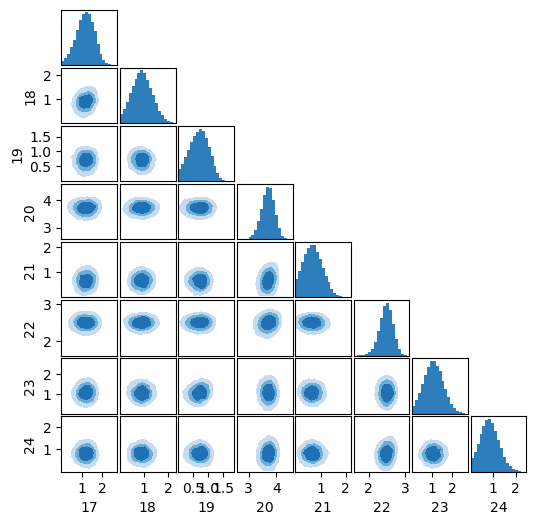

In [20]:
dims = [17,18,19,20,21, 22, 23, 24]
names = [17,18,19,20,21, 22, 23, 24]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

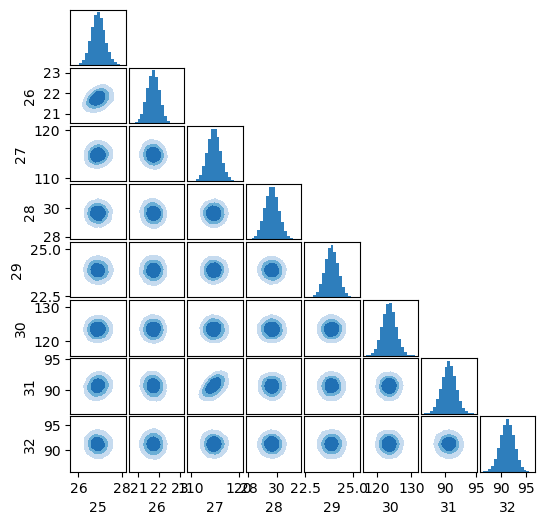

In [21]:
dims = [25,26,27,28,29, 30, 31, 32]
names = [25,26,27,28,29, 30, 31, 32]
levels = [0.1, 0.8, 0.9, 0.95, 1,]
# levels = [0.1, 0.5, 1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)